## Final Project Submission

Please fill out:
* Student name: Tim Fuger
* Student pace: Part time
* Scheduled project review date/time: 6/17/22 at 3 pm
* Instructor name: Morgan Jones
* Blog post URL: TBD


## Project Goal

The goal of this project is to research/analyze movie data from multiple sources in order to make a recommendation to a new movie studio company (Microsoft) on what types of movies they should pursue.

The primary ask from the company is that the type of movies they pursue are similar to the ones "doing best at the box office." From a business perspective, I believe that they are looking to receive the greatest return on the investment that is placed in the movie. To understand what has given the best ROI in the past, we must dig into the data on previous movies and analyze the metrics. We will also analyze the budgets of these movies to determine what the range of spending will be for a movie project.

## Data Source and Data Exploration

The data shown in the following notebook comes from five main sources. 

1. Box Office Mojo
2. IMDB
3. Rotten Tomatoes
4. TheMovieDB
5. The Numbers



We start by importing the proper packages required

In [1]:
import sqlite3
conn = sqlite3.connect("zippedData/im.db/im.db")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_theme()

## Create Dataframes

In the next segment, we create dataframes for each data source available

In [2]:
BOM_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
# Combine movie ratings and movie basics from the IMDB dataset to create one dataframe
imdb_movie_df = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings USING(movie_id)
;
""", conn)
rtmovieinfo_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rtreviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tnmoviebudget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
imdb_movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [4]:
rtmovieinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
rtreviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
tnmoviebudget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


After getting a glimpse of all of the data, we have the following categorical data to work with:

1. Box Office Mojo
    1. title
    2. studio
    3. domestic gross
    4. foreign gross
    5. year
2. IMDB
    1. movie id
    2. primary title
    3. original title
    4. start year
    5. runtime
    6. genre
    7. average rating
    8. number votes
3. Rotten Tomatoes - movie info
    1. id
    2. synopsis
    3. rating
    4. genre
    5. director
    6. writer
    7. theatre date
    8. dvd date
    9. currency
    10. box office
    11. runtime
    12. studio
4. Rotten Tomatoes - review info
    1. id
    2. review
    3. rating
    4. fresh
    5. critic
    6. top critic
    7. publisher
    8. date
4. TheMovieDB
    1. Unnamed 0
    2. genre id
    3. id
    4. original language
    5. original title
    6. popularity
    7. release date
    8. title
    9. vote average
    10. vote count
5. The Numbers
    1. id
    2. release date
    3. movie
    4. production budget
    5. domestic gross
    6. worldwide gross

From the above categorical data, we can better understand the variables we have to analyze the movie datasets. As a result, we can better formulate our questions.

The first question to answer (and the most important) is "What are the movies that have the highest return on investment?" Without having dug into the data yet, we should be able to determine this by first finding the highest profiting movies (difference between budget and gross revenue) from datasets where we have budget and revenue available to us. Then calculate the ROI (return on investment) percentage for each of those movies by taking the profit over the budget (initial investment).

Once we determine which movies provide the highest ROI (above a percentage threshold), then we can  analyze those values in the organized set for both the average/range of production budget values, as well as analyze some matching characteristics within that range. Therefore our second question to answer will be "What is the average production budget the company will have to spend on a movie?" The third question will be "What are the matching charateristics between the movies with the highest return on investment?" Based on the categorical data we have to work with, we can look at genre, and runtime as they pertain to ROI. 

We also have data in the rotten tomatoes datasets that can inform our recommendation. These datasets do not have movie titles unfortunately, so we will need to infer the success of these movies using the average viewer ratings of the movies. We can then analyze the categorical data from the higher end of those ratings to make a soft recommendation on what the best rating and movie director is for the success of a movie.

We will start with determining the highest profiting movie by taking the difference between the production budget and domestic gross from the "The Numbers" dataset.

First we clean the dataframe by converting the budget, and gross columns from strings to floats. Take out the commas, remove the $ sign and convert the object to float

In [8]:
# remove commas
tnmoviebudget_df = tnmoviebudget_df.replace(',','', regex=True)
tnmoviebudget_df = tnmoviebudget_df.set_index('movie')

# take out $ sign and convert numbers from string to float
tnmoviebudget_df['production_budget'] = tnmoviebudget_df['production_budget'].str[1:].astype(float)
tnmoviebudget_df['domestic_gross'] = tnmoviebudget_df['domestic_gross'].str[1:].astype(float)
tnmoviebudget_df['worldwide_gross'] = tnmoviebudget_df['worldwide_gross'].str[1:].astype(float)

Next we will calculate the difference between the worldwide gross and budget, which should give us an idea of profit for the movies. Then we will drop any rows with negative values for profit.

In [9]:
# calculate difference between gross and production budget
tnmoviebudget_df['Profit'] = tnmoviebudget_df['worldwide_gross'] - tnmoviebudget_df['production_budget']

# any negative values converted to zero
tnmoviebudget_df[tnmoviebudget_df['Profit'] < 0] = 0

In [10]:
# drop all zero values
tnmoviebudget_df = tnmoviebudget_df.loc[tnmoviebudget_df['Profit'] != 0]

In [11]:
# sort the values by the highest difference between worldwide gross and production budget
tnmovieBudget_df = tnmoviebudget_df.sort_values(by=['Profit'], ascending=False, inplace = True)

In [12]:
# How many movies we have in the dataframe
# notice how this compares to the count of movies in adjusted dataframes as we continue with this notebook
len(tnmoviebudget_df.index)

3657

In [13]:
tnmoviebudget_df.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit
movie,,,,,,
Avatar,1,Dec 18 2009,425000000.0,760507625.0,2.776345e+09,2.351345e+09
Titanic,43,Dec 19 1997,200000000.0,659363944.0,2.208208e+09,2.008208e+09
Avengers: Infinity War,7,Apr 27 2018,300000000.0,678815482.0,2.048134e+09,1.748134e+09
Star Wars Ep. VII: The Force Awakens,6,Dec 18 2015,306000000.0,936662225.0,2.053311e+09,1.747311e+09
Jurassic World,34,Jun 12 2015,215000000.0,652270625.0,1.648855e+09,1.433855e+09


Now we will take a look at the highest return on investment for the movies

In [14]:
# calculate the return on investment using the difference between the domestic gross and the prodbudget
tnmoviebudget_df['ROI'] = ( tnmoviebudget_df['Profit'] / tnmoviebudget_df['production_budget'] )*100
tnmoviebudget_df['ROI'] = tnmoviebudget_df['ROI'].astype(int)
tnmovieBudget_df = tnmoviebudget_df.sort_values(by=['ROI'], ascending=False, inplace = True)

In [15]:
tnmoviebudget_df.head(10)

,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit,ROI
movie,,,,,,,
Deep Throat,46,Jun 30 1972,25000.0,45000000.0,45000000.0,44975000.0,179900
Mad Max,14,Mar 21 1980,200000.0,8750000.0,99750000.0,99550000.0,49775
Paranormal Activity,93,Sep 25 2009,450000.0,107918810.0,194183034.0,193733034.0,43051
The Gallows,80,Jul 10 2015,100000.0,22764410.0,41656474.0,41556474.0,41556
The Blair Witch Project,7,Jul 14 1999,600000.0,140539099.0,248300000.0,247700000.0,41283
Super Size Me,10,May 7 2004,65000.0,11529368.0,22233808.0,22168808.0,34105
Bambi,47,Aug 13 1942,858000.0,102797000.0,268000000.0,267142000.0,31135
El Mariachi,74,Feb 26 1993,7000.0,2040920.0,2041928.0,2034928.0,29070
Night of the Living Dead,77,Oct 1 1968,114000.0,12087064.0,30087064.0,29973064.0,26292


The first movie in the list is an anomaly as Deep throat was a start of a popularization of a new movie genre. So we can remove that right away

In [16]:
# removing the first row
tnmoviebudget_df = tnmoviebudget_df.iloc[1:,:]

In [17]:
# Reduce the scale of the profit, worldwid gross, domestic gross, and production_budget columns by 1 million
tnmoviebudget2_df = tnmoviebudget_df
tnmoviebudget2_df['Profit'] = tnmoviebudget_df['Profit'] / 1000000
tnmoviebudget2_df['production_budget'] = tnmoviebudget_df['production_budget'] / 1000000
tnmoviebudget2_df['domestic_gross'] = tnmoviebudget_df['domestic_gross'] / 1000000
tnmoviebudget2_df['worldwide_gross'] = tnmoviebudget_df['worldwide_gross'] / 1000000

Lets take a quick look at ROI vs Profit

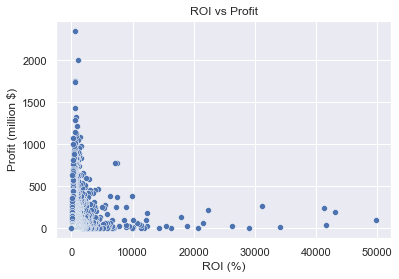

In [18]:
ax = sns.scatterplot(x=tnmoviebudget2_df['ROI'], y=tnmoviebudget2_df['Profit'])
ax.set(xlabel="ROI (%)", ylabel="Profit (million $)", title="ROI vs Profit");

Based on the scatter plot above we can see that most of the movies we now have in the dataset fall closer to the 0,0 mark which means the gross of the movie was the same as the budget. Since we are looking for the highest rate of return we can just take all of movies that fall above 200% ROI and analyze those.

In [19]:
# Remove all movies that fall below 200 ROI
tnmoviebudgetROI_df = tnmoviebudget2_df.loc[tnmoviebudget_df['ROI'] > 200]


1846

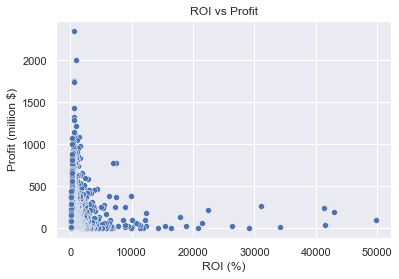

In [20]:
# suppress c argument error for color
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# plot roi vs profit
ax = sns.scatterplot(x=tnmoviebudgetROI_df['ROI'], y=tnmoviebudgetROI_df['Profit'])
ax.set(xlabel="ROI (%)", ylabel="Profit (million $)", title="ROI vs Profit");

# print the amount of movies we have to work with
len(tnmoviebudgetROI_df.index)

The plot above looks the same, but the points are so close together that it is not clear that we have removed any movies. But from printing the amount of movies we have in the dataframe, it is clear that there are about half the amount of movies than what we started with.

Lets take a look at how ROI compares with profit and budget

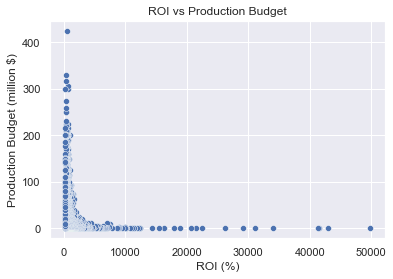

In [21]:
ax = sns.scatterplot(x=tnmoviebudgetROI_df['ROI'], y=tnmoviebudgetROI_df['production_budget'])
ax.set(xlabel="ROI (%)", ylabel="Production Budget (million $)", title="ROI vs Production Budget");

Looks like the greater the production budget, the far less ROI there is in the movie. That doesnt necessarily mean the studio didnt make money, as ROI is calculated as a percentage. But we should probably take the midrange of movies as I dont see a new Microsoft pursuing something at the high end of the spectrum, but they also probably have enough money that they do not want to spend at the low end of the spectrum either.

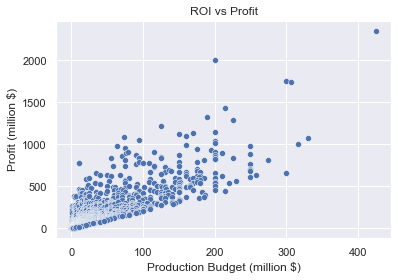

In [22]:
ax = sns.scatterplot(x=tnmoviebudgetROI_df['production_budget'], y=tnmoviebudgetROI_df['Profit'])
ax.set(xlabel="Production Budget (million $)", ylabel="Profit (million $)", title="ROI vs Profit");

Lets also get a look at where most of these fall within these variables as a standard budget that it spent, and the average profit that is earned from that spending category

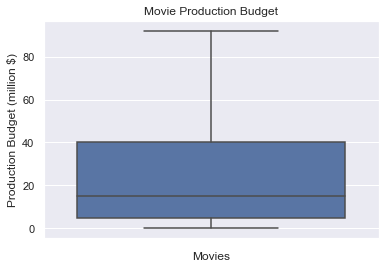

In [23]:
ax = sns.boxplot(y=tnmoviebudgetROI_df['production_budget'], showfliers = False);
ax.set(xlabel='Movies', ylabel="Production Budget (million $)", title="Movie Production Budget");

In [24]:
tnmoviebudgetROI_df['production_budget'].describe()

count    1846.000000
mean       34.491125
std        48.799246
min         0.001100
25%         5.000000
50%        15.000000
75%        40.000000
max       425.000000
Name: production_budget, dtype: float64

So the mean (average) production budget for movies that receive over 200% ROI is around 35,000,000 dollars. The cost of the majority of these movies ranges from the 25% quartile at 5,000,000 dollars to the 75% quartile at 40,000,000 dollars. We do not know how much Microsoft would like to spend, but a good recommendation would be to suggest starting in the average quartile range from 5 million to 40 million dollars. Given that, we should then isolate these movies to analyze going forward.

In [25]:
tnmoviebudgetROI2_df = tnmoviebudgetROI_df[tnmoviebudgetROI_df['production_budget'] > 5]
tnmoviebudgetROI2_df = tnmoviebudgetROI2_df[tnmoviebudgetROI2_df['production_budget'] < 40]
tnmoviebudgetROI2_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit,ROI
movie,,,,,,,
ET: The Extra-Terrestrial,26,Jun 11 1982,10.50,435.110554,792.965326,782.465326,7452
Star Wars Ep. IV: A New Hope,65,May 25 1977,11.00,460.998007,786.598007,775.598007,7050
Grease,13,Jun 16 1978,6.00,181.813770,387.510179,381.510179,6358
Les Intouchables,18,May 25 2012,10.80,13.182281,484.873045,474.073045,4389
Annabelle,84,Oct 3 2014,6.50,84.273813,256.862920,250.362920,3851
...,...,...,...,...,...,...,...
Why Did I Get Married Too?,16,Apr 2 2010,20.00,60.095852,60.831067,40.831067,204
Kabhi Alvida Naa Kehna,20,Aug 11 2006,10.75,3.275443,32.575443,21.825443,203
Daddy Day Camp,39,Aug 8 2007,6.00,13.235267,18.209872,12.209872,203


834

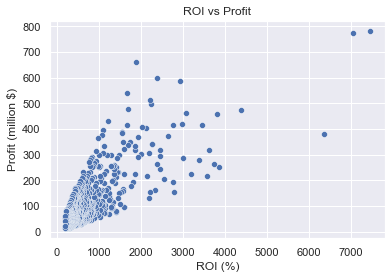

In [26]:
# plot roi vs profit
ax = sns.scatterplot(x=tnmoviebudgetROI2_df['ROI'], y=tnmoviebudgetROI2_df['Profit'])
ax.set(xlabel="ROI (%)", ylabel="Profit (million $)", title="ROI vs Profit");

# print the amount of movies we have to work with
len(tnmoviebudgetROI2_df.index)

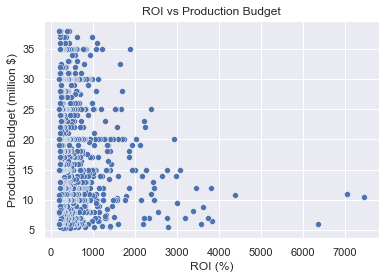

In [27]:
ax = sns.scatterplot(x=tnmoviebudgetROI2_df['ROI'], y=tnmoviebudgetROI2_df['production_budget'])
ax.set(xlabel="ROI (%)", ylabel="Production Budget (million $)", title="ROI vs Production Budget");

Lets take a look at how much Microsoft can make with this range of movies

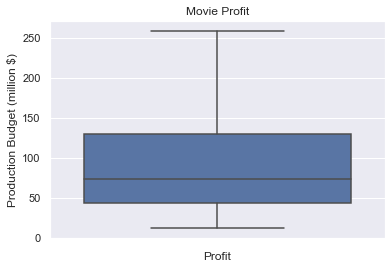

In [46]:
ax = sns.boxplot(y=tnmoviebudgetROI2_df['Profit'], showfliers = False);
ax.set(xlabel='Profit', ylabel="Production Budget (million $)", title="Movie Profit");

In [29]:
tnmoviebudgetROI2_df['Profit'].describe()

count    834.000000
mean     105.016908
std       98.287702
min       12.107621
25%       44.140602
50%       73.393071
75%      130.324451
max      782.465326
Name: Profit, dtype: float64

Looks like with these recommendations they can make anywhere from 12,000,000 to 260,000,000 dollars in profit.

Now that we have determined the movies to use, we will analyze their characteristics to make recommendations. We will need to combine the datasets in order to relate the data to one another. For the genre and the runtime we can use the IMDB dataset, for the director we can use the Rotten tomatoes movie info dataset, and for the rating we can use the Rotten tomatoes review info dataset.

First we will take the tnmovie dataset that we have been working with and find those equivalent movies in the IMDB datset to use as reference.

In [30]:
# Set the index to original title in order to use as our key to join IMDB and the numbers datasets
imdb_movie_df = imdb_movie_df.set_index('original_title')
imdb_movie_df

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
original_title,,,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
Ashad Ka Ek Din,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
La Telenovela Errante,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
Diabolik sono io,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
Sokagin Çocuklari,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
Albatross,tt9914642,Albatross,2017,NaN,Documentary,8.5,8


In [31]:
# combine the tn movie and imdb dataset
moviescombined_df = tnmoviebudgetROI2_df.join(imdb_movie_df, how='inner')

Now that we have combined the movie data, we can analyze any categories that fall in this list to the ROI. Lets start with genre

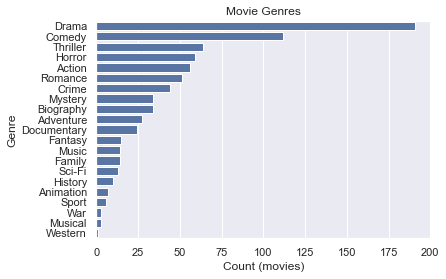

In [32]:
# Split genres into a combined list of all of the genres
unique_genres = [val.strip() for sublist in moviescombined_df.genres.dropna().str.split(",").tolist() for val in sublist]
# Gets a unique list of all of the genres
genre, counts = np.unique(unique_genres, return_counts=True)

arr1inds = np.argsort(counts)
sorted_counts = counts[arr1inds[::-1]]
sorted_genre = genre[arr1inds[::-1]]

barplot = sns.barplot(y=sorted_genre, x=sorted_counts, color='b')
barplot.set(xlabel="Count (movies)", ylabel="Genre", title="Movie Genres");

It looks like the most successful genre categories are Drama, Comedy, and Thriller. With Drama being almost double in frequency as compared to the the next sucessful genre.

Lets look at runtime next

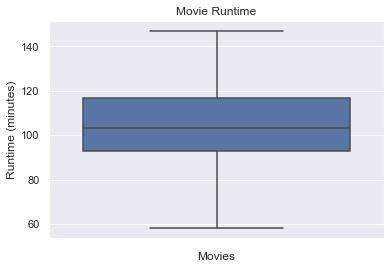

In [33]:
# boxplot = moviescombined_df.boxplot(column=['runtime_minutes'])
# boxplot.set(xlabel =None, ylabel="Runtime (minutes)", title="Movie Runtime");

ax = sns.boxplot(y=moviescombined_df['runtime_minutes'], showfliers = False);
ax.set(xlabel='Movies', ylabel="Runtime (minutes)", title="Movie Runtime");

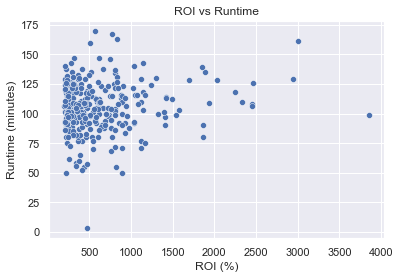

In [34]:
ax = sns.scatterplot(x=moviescombined_df['ROI'], y=moviescombined_df['runtime_minutes'])
ax.set(xlabel="ROI (%)", ylabel="Runtime (minutes)", title="ROI vs Runtime");

In [35]:
moviescombined_df['runtime_minutes'].describe()

count    331.000000
mean     104.323263
std       20.262849
min        3.000000
25%       93.000000
50%      103.000000
75%      116.500000
max      170.000000
Name: runtime_minutes, dtype: float64

Looks like the average runtime is at around 104 minutes, and the times can vary from the 93 minutes at the 25% quartile to 116.5 minutes at the 75% quartile

In [36]:
rtreviews_df.dtypes

id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

In [37]:
# Converts string overall rating (example. 3/5) to just a number
rtreviews_df['rating_cleaned'] = rtreviews_df['rating'].str.split('/').str[0]

In [38]:
# removes any rows that contain letter ratings
rtreviews_df = rtreviews_df[rtreviews_df["rating_cleaned"].str.contains("NaN|N|T|R| |A+|A|A-|B+|B|B-|C+|C|C-|D+|D|D-|F+|F|F-|1-5")==False]

In [39]:
# show al values in column to confirm we did not miss any values
rtreviews_df.rating_cleaned.unique()

array(['3', '2', '4', '6', '1', '8', '2.5', '2.0', '7', '5', '3.5', '1.5',
       '9', '7.5', '5.5', '0', '0.5', '3.1', '4.5', '4.0', '9.5', '2.1',
       '6.5', '3.7', '8.4', '7.2', '2.2', '7.7', '5.0', '8.5', '3.0',
       '2.3', '8.6', '2.7', '4.2', '5.8', '7.1', '5.9', '2.4', '1.9',
       '4.9', '7.4', '8.8', '3.8', '6.8', '7.3', '7.0', '3.2', '6.3',
       '7.6', '8.1', '3.6', '1.8', '8.9', '8.2', '8.3', '2.6', '4.1',
       '6.0', '1.0', '7.9', '8.7', '4.3', '9.6', '9.0', '1.7', '6.7',
       '8.0', '9.2', '5.2', '4.7', '6.2', '3.4', '9.7', '3.3', '4.8',
       '1.6', '7.8', '4.4', '6.9', '9.8'], dtype=object)

In [40]:
# Pandas was throwing a "setting with copy warning" for the second line in this code. Need to include the first line which
# copies the column then convert it from string to float values
rtreviews_df = rtreviews_df[rtreviews_df['rating_cleaned'].notnull()].copy()
rtreviews_df['rating_cleaned'] = rtreviews_df['rating_cleaned'].astype(float)

In [41]:
# keeps all ratings above 7
rtreviews_df = rtreviews_df.loc[rtreviews_df['rating_cleaned'] > 7.0]

In [42]:
# sets index to the movie id
rtmovieinfo_df = rtmovieinfo_df.set_index('id')

In [43]:
# gets all unique ids and gets those ids in the rtmovieinfo dataframe
rtmovieid = rtreviews_df.id.unique()
rtmovieinfo_df = rtmovieinfo_df.loc[rtmovieid]

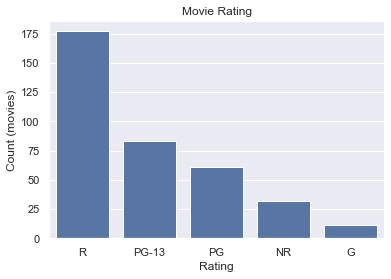

In [44]:
# sorts and plots movie ratings
rating = rtmovieinfo_df['rating'].value_counts(sort=True)

barplot2 = sns.barplot(x=rating.index, y=rating.values, color='b')
barplot2.set(xlabel="Rating", ylabel="Count (movies)", title="Movie Rating");


Looks like the most popular movie ratings are R, PG-13, and PG. The R rating bets the next movie rating by about double in frequency.

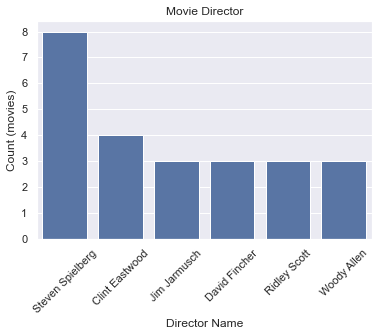

In [45]:
rtdirectors = rtmovieinfo_df['director'].value_counts()
rtdirectorsbool = rtdirectors > 2
rtdirectorsprimary = rtdirectorsbool[rtdirectorsbool].index
rtdirectorsprimary_df = rtdirectors[rtdirectorsprimary]


# barplot3 = rtdirectorsprimary_df.plot( kind='bar');
# barplot3.set(xlabel = 'Director Name', ylabel="Count (movies)", title="Movie Director");

barplot3 = sns.barplot(x=rtdirectorsprimary_df.index, y=rtdirectorsprimary_df.values, color='b')
barplot3.set(xlabel="Director Name", ylabel="Count (movies)", title="Movie Director")
plt.xticks(rotation=45);

 In experimenting with the number above it looks like there are over 30 directors who have done 2 or more movies, but there are 6 directors who have only done 3 or more movies. One of the directors, Woody Allen, is actually no longer active in directing. So we will use the other 5 as our list of recommendations for the directors.

Our results have revealed a few findings on Microsoft pursuing a movie studio. Here are the takeaways in analyzing movies that have at least 200% ROI:
- The average cost of production for a movie with the range being the 25% to 75% quartile range, can be 5 million to 40 million dollars.
- The profit for a movie with the range being the 25% to 75% quartile range, can be 12 million to 260 million dollars.

Analyzing movies that have at least 200% ROI and a range of production cost being from 5 million to 40 million:
- The genre ordered by highest frequency in the dataset are Drama, Comedy, and Thriller
- The runtime for a movie with the range being the 25% to 75% quartile range, can be from 93 minutes to 116.5 minutes long

Analyzing viewer reviews that are over 7 out of 10:
- The directors listed by highest frequency in the dataset are Steven Spielberg, Clint Eastwood, Ridley Scott, Jim Jamusch, and David Fincher (these exclude Woody Allen who is no longer active as a director).
- The rating listed by highest frequency in the dataset are R, PG-13, and PG.
